In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import find_peaks
import time 

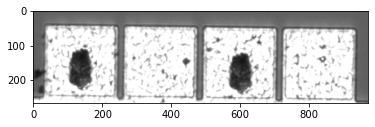

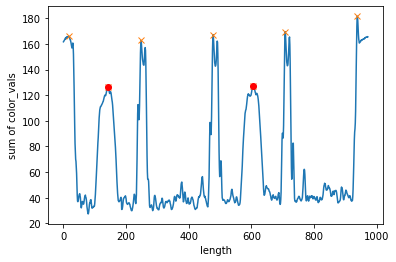

 Num is 10


In [46]:
def rgb2gray(rgb):
    if rgb.ndim == 3:
        r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
        gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
        return gray/255
    elif np.any(rgb>1): 
        return rgb/255

def nib_to_num(im, plot=0):
    x = np.sum(1-rgb2gray(im),axis=0)
    peaks, other = find_peaks(x, height=80, distance = 100) ##points which are peaks
    h = np.array(other['peak_heights'])
    if len(h) > 5: 
        tf = np.where(h < np.mean([np.min(h), np.max(h)]), True, False)
        ind = np.where(tf == True)[0]
        p = np.array([int(4-len(np.where(tf[0:t] == False)[0])) for t in ind])
        if p < 0: return -1
        number = np.sum(2**p)
    else: number = 0; tf = np.zeros(len(h)).astype(bool)
    if plot ==1:
        plt.plot(x); plt.plot(peaks, x[peaks], "x"); plt.plot(peaks[tf], x[peaks][tf], "o", color='red');
        plt.xlabel('length'); plt.ylabel('sum of color_vals')
        plt.show(); plt.close();
    return number

for i in [30]:#,31,32,33,34,35,36,37,16,4,0]:
    im = np.array(Image.open(f'scratchpad_{i}_crop.png'))
    plt.imshow(im, cmap='gray', vmin = 0, vmax = 1); plt.show(); plt.close()
    print(f' Num is {nib_to_num(im, plot=1)}')

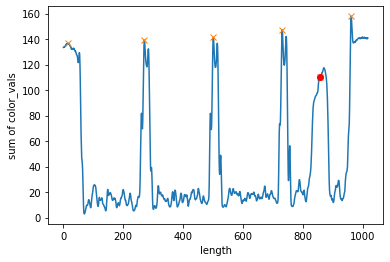

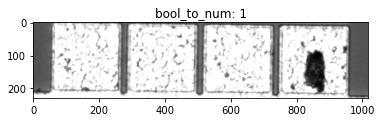

------------------------------------------


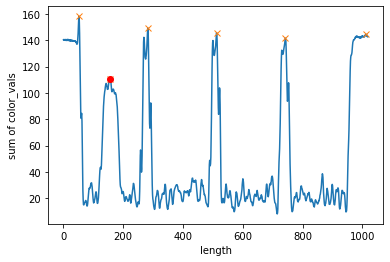

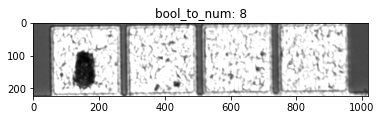

------------------------------------------


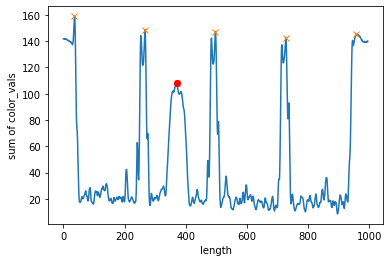

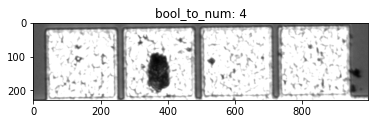

------------------------------------------


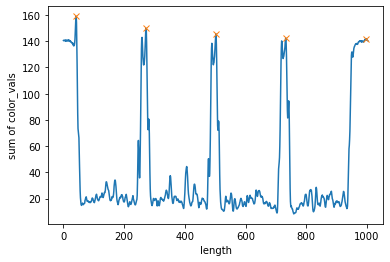

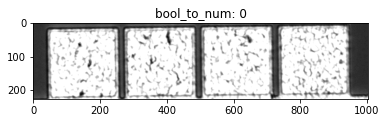

------------------------------------------


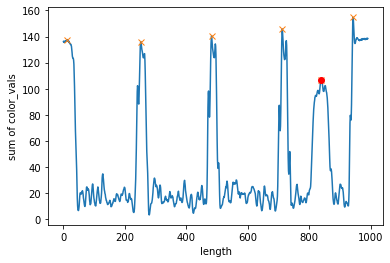

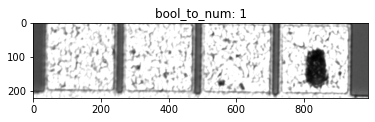

------------------------------------------


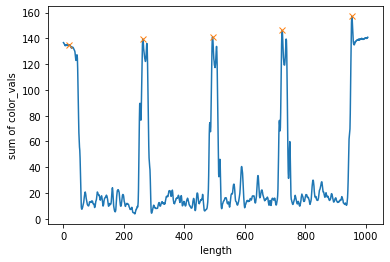

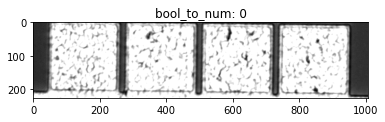

------------------------------------------


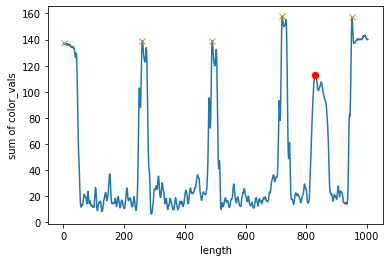

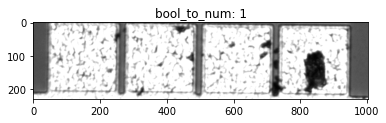

------------------------------------------


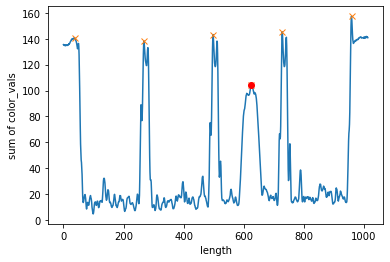

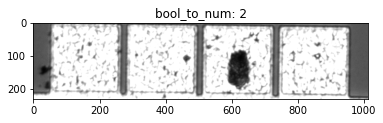

------------------------------------------


In [78]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def draw_box(img, template):
    w, h = template.shape[::-1]
    res = cv.matchTemplate(img,template,eval('cv.TM_CCOEFF'))
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    bottom_left = max_loc
    top_right = (bottom_left[0] + w, bottom_left[1] + h)
    crop = img[int(1.02*bottom_left[1]): int((bottom_left[1] + h)*1), int(bottom_left[0]*0.95): int((bottom_left[0]+w)*1.02)].copy()
    cv.rectangle(img, bottom_left, top_right, (0,0,255) , thickness = 25)
    return img, crop

# for n in [0,20,8,4]:
#     fnames = [f'scratchpad_{n}.png'] # for i in [20,12,8,4,0]]
#     img = cv.imread(fnames[0], cv.IMREAD_GRAYSCALE)
#     template = cv.imread(f'scratch_temp_{n}.png', cv.IMREAD_GRAYSCALE)
#     temp2 = cv.imread(f'scratchpad_{16}_crop.png', cv.IMREAD_GRAYSCALE)
# #     img = draw_box(img, template)
#     img, crop = draw_box(img, temp2)
# #     plt.imshow(img,cmap = 'gray'); plt.show(); plt.close()
#     plt.imshow(crop,cmap = 'gray'); plt.show(); plt.close()
#     print(nib_to_num(crop,plot=1))
# #     plt.imshow(template,cmap = 'gray'); plt.show(); plt.close()
# #     plt.imshow(temp2,cmap = 'gray'); plt.show(); plt.close()

for n in [0,'02',48,61,20,12,8,4]:
    fnames = [f'scratchpad_{n}.png'] # for i in [20,12,8,4,0]]
    img = cv.imread(fnames[0], cv.IMREAD_GRAYSCALE)
    temp2 = cv.imread(f'scratchpad_{16}_crop.png', cv.IMREAD_GRAYSCALE)
    img, crop = draw_box(img, temp2)
    num = nib_to_num(crop,plot=1)
    plt.imshow(crop,cmap = 'gray'); plt.title(f'bool_to_num: {num}'); plt.show(); plt.close()
    print('------------------------------------------')



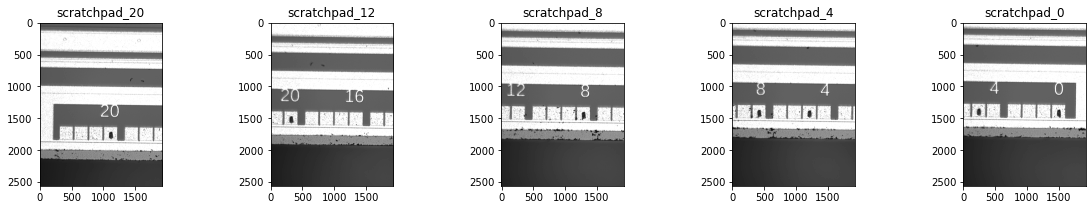

In [7]:
fnames = [f'scratchpad_{i}.png' for i in [20,12,8,4,0]]
imArr = [np.array(Image.open(fname)) for fname in fnames]

fig= plt.figure(figsize=(20,3))
axs = fig.subplots(1, 5)

for i in range(len(imArr)):
    axs[i].imshow(rgb2gray(imArr[i]), cmap='gray', vmin = 0, vmax = 1) 
    axs[i].set_title(fnames[i].split('.png')[0])

plt.show(); plt.close()

In [6]:
for i in [30]:#,31,32,33,34,35,36,37,16,4,0]:
    imTemp = np.array(Image.open(f'scratchpad_{i}_crop.png'))
#     plt.imshow(rgb2gray(imTemp), cmap='gray', vmin = 0, vmax = 1); plt.show(); plt.close()

    x = np.sum(1-rgb2gray(imTemp),axis=0)
    peaks, other = find_peaks(x, height=80, distance = 100) ##points which are peaks
#     plt.plot(x); plt.plot(peaks, x[peaks], "x"); 
#     plt.xlabel('length'); plt.ylabel('sum of color_vals')
#     plt.show(); plt.close()

    h = np.array(other['peak_heights'])
    if len(h) > 5:
        start = time.time()
        ### method 1
        if len(h) == (5+4): b, p = [1,1,1,1], 15
        else:    
            tf = peaks[np.where(x[peaks] > np.mean([np.min(h), np.max(h)]))[0]]
            if len(tf) > 5: print('Do manual')
            else:
                mid = x[((tf[0:-1]+tf[1:])/2).astype(int)]
                b = np.flip(np.where(mid > np.mean([np.max(mid), np.min(mid)]), 1,0))
                p = np.sum([b[i]*2**i for i in range(len(b))])
        print(f'Number is {p}')            
        t1 = time.time()-start 
        start = time.time()
        ### method 2
        tf = np.where(h < np.mean([np.min(h), np.max(h)]), True, False)
        ind = np.where(tf == True)[0]
        p = np.array([int(4-len(np.where(tf[0:t] == False)[0])) for t in ind])
#         print(f'Peak(s) in bit {p}.') 
        print(f'Number is {np.sum(2**p)}') 
        t2 = time.time()-start
        print(t1, t2)
        if t1>t2: print('       M2 wins','\n')
        else: print('M1 wins', '\n')
    else: print('No scratch.')

Number is 10
Number is 10
0.00031828880310058594 0.00019216537475585938
       M2 wins 



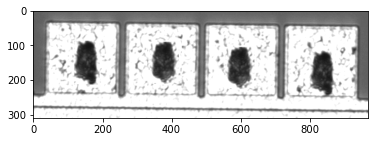

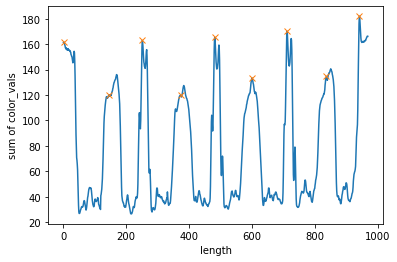

Peak(s) in bit [1 1 1 1]. Number is 15


In [26]:
for i in [33]:#[30,31,32,33,34,35,36,37,16,4,0]:
    imTemp = np.array(Image.open(f'scratchpad_{i}_crop.png'))
    plt.imshow(rgb2gray(imTemp), cmap='gray', vmin = 0, vmax = 1); plt.show(); plt.close()

    x = np.sum(1-rgb2gray(imTemp),axis=0)
    peaks, other = find_peaks(x, height=80, distance = 100) ##points which are peaks
    plt.plot(x); plt.plot(peaks, x[peaks], "x"); 
    plt.xlabel('length'); plt.ylabel('sum of color_vals')
    plt.show(); plt.close()
    h = np.array(other['peak_heights'])
    if len(h) > 5:
        if len(h) == (5+4): b, p = [1,1,1,1], 15
        else:    
            tf = peaks[np.where(x[peaks] > np.mean([np.min(h), np.max(h)]))[0]]
            if len(tf) > 5: print('Do manual')
            else:
                mid = x[((tf[0:-1]+tf[1:])/2).astype(int)]
                b = np.flip(np.where(mid > np.mean([np.max(mid), np.min(mid)]), 1,0))
                p = np.sum([b[i]*2**i for i in range(len(b))])
        print(f'Peak(s) in bit {np.flip(b)}. Number is {p}')
    else: print('No scratch.')

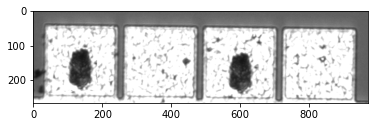

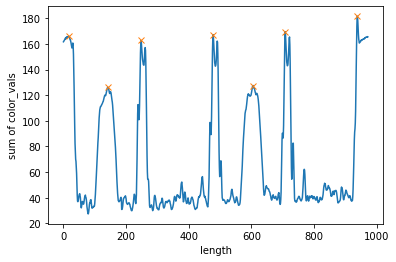

Peak(s) in bit [3 1]. Number is 10


In [5]:
for i in [30]:#,31,32,33,34,35,36,37,16,4,0]:
    imTemp = np.array(Image.open(f'scratchpad_{i}_crop.png'))
    plt.imshow(rgb2gray(imTemp), cmap='gray', vmin = 0, vmax = 1); 
    plt.show(); plt.close()

    x = np.sum(1-rgb2gray(imTemp),axis=0)
    peaks, other = find_peaks(x, height=80, distance = 100) ##points which are peaks
    plt.plot(x); plt.plot(peaks, x[peaks], "x"); 
    plt.xlabel('length'); plt.ylabel('sum of color_vals')
    plt.show(); plt.close()
    
    h = np.array(other['peak_heights'])
    if len(h) > 5:
        tf = np.where(h < np.mean([np.min(h), np.max(h)]), True, False)
        ind = np.where(tf == True)[0]
        p = np.array([int(4-len(np.where(tf[0:t] == False)[0])) for t in ind])
        print(f'Peak(s) in bit {p}. Number is {np.sum(2**p)}')
    else: print('No scratch.')

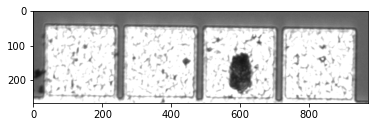

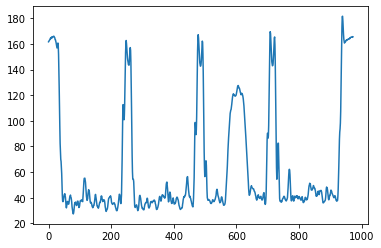

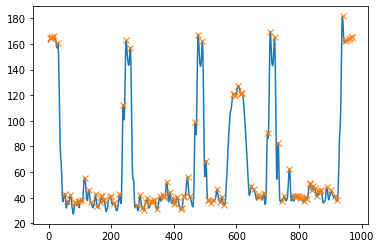

In [38]:
imTemp = np.array(Image.open('scratchpad_4_crop.png'))
plt.imshow(rgb2gray(imTemp), cmap='gray', vmin = 0, vmax = 1); plt.show(); plt.close()
plt.plot(np.sum(1-rgb2gray(imTemp),axis=0)); plt.show(); plt.close()
x = np.sum(1-rgb2gray(imTemp),axis=0)
peaks, _ = find_peaks(x, height=0)
plt.plot(x);
plt.plot(peaks, x[peaks], "x"); plt.show(); plt.close()

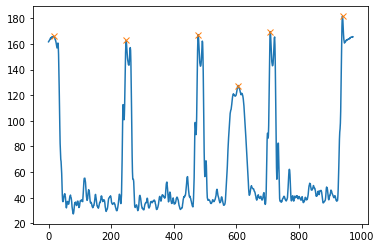

{'peak_heights': array([166.03362706, 162.72023294, 167.25311294, 127.54335882,
       169.60189765, 181.64383059]), 'prominences': array([  4.32897882, 132.80240471, 133.10041412,  92.73974471,
       133.68074824,  20.93124   ]), 'left_bases': array([  0,  79,  79, 559,  79,  79]), 'right_bases': array([ 79, 285, 559, 692, 877, 945])}
[ 17 248 478 606 708 939]


In [59]:
peaks, other = find_peaks(x, height=80, distance = 100) ##points which are peaks
plt.plot(x); plt.plot(peaks, x[peaks], "x"); plt.show(); plt.close()

print(other)
print(peaks)